In [1]:
import pandas as pd
tennis = pd.read_csv("https://raw.githubusercontent.com/abhinav12347/stat-517/master/Stats_Final_Project_517_Updated_Abhinav.csv")
tennis.head()

,Unnamed: 0,X,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1,1,32,A,20180101,300,106401,Nick Kyrgios,1,193,...,5,8,3,58,32,22,12,9,4,7
1,2,2,32,A,20180101,299,106401,Nick Kyrgios,1,193,...,2,5,6,74,44,32,16,13,3,6
2,3,3,32,A,20180101,298,105992,Ryan Harrison,1,183,...,6,9,5,94,62,49,16,16,0,3
3,4,4,32,A,20180101,297,105777,Grigor Dimitrov,1,188,...,2,6,1,89,53,39,23,15,4,6
4,5,5,32,A,20180101,296,106401,Nick Kyrgios,1,193,...,3,6,3,75,41,33,16,13,2,4


In [2]:

import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:

print (tennis.columns.values)
print (tennis.describe(include=['O']))

['Unnamed: 0' 'X' 'draw_size' 'tourney_level' 'tourney_date' 'match_num'
 'winner_id' 'winner_name' 'winner_hand' 'winner_ht' 'winner_ioc'
 'winner_age' 'winner_rank_points' 'loser_id' 'loser_name' 'loser_hand'
 'loser_ht' 'loser_ioc' 'loser_age' 'loser_rank_points' 'best_of' 'round'
 'minutes' 'w_ace' 'w_df' 'w_svpt' 'w_1stIn' 'w_1stWon' 'w_2ndWon'
 'w_SvGms' 'w_bpSaved' 'w_bpFaced' 'l_ace' 'l_df' 'l_svpt' 'l_1stIn'
 'l_1stWon' 'l_2ndWon' 'l_SvGms' 'l_bpSaved' 'l_bpFaced']
       tourney_level    winner_name winner_ioc       loser_name loser_hand  \
count          97888          97888      97888            97888      97857   
unique             6           2223        121             3271          3   
top                A  Roger Federer        USA  Fabrice Santoro          R   
freq           57264           1179      12034              444      80995   

       loser_ioc  round  
count      97888  97888  
unique       129      9  
top          USA    R32  
freq       10856  32312  


In [4]:
tennis_new = pd.get_dummies(tennis, columns=["tourney_level", "winner_name", "winner_ioc", "loser_name", "loser_hand", "loser_ioc", "round"])
print (tennis_new.shape)
tennis_new.head()

(97888, 5796)


,Unnamed: 0,X,draw_size,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_age,winner_rank_points,...,loser_ioc_ZIM,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,1,1,32,20180101,300,106401,1,193,22.683094,2010,...,0,0,1,0,0,0,0,0,0,0
1,2,2,32,20180101,299,106401,1,193,22.683094,2010,...,0,0,0,0,0,0,0,0,0,1
2,3,3,32,20180101,298,105992,1,183,25.653662,1010,...,0,0,0,0,0,0,0,0,0,1
3,4,4,32,20180101,297,105777,1,188,26.631075,5150,...,0,0,0,1,0,0,0,0,0,0
4,5,5,32,20180101,296,106401,1,193,22.683094,2010,...,0,0,0,1,0,0,0,0,0,0


In [5]:
import pandas as pd
from sklearn.cross_validation import train_test_split
y_tennis_new = pd.DataFrame([tennis_new.w_ace]).T
X_tennis_new = pd.DataFrame(tennis_new)
X_tennis_new = tennis_new.drop(['w_ace'], axis = 1)
X_tennis_new
X_train, X_test, y_train, y_test = train_test_split(X_tennis_new, y_tennis_new, random_state = 0, test_size = 0.25)

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Linear Regression

In [6]:
from scipy import stats
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
acc_lr = lr.score(X_train, y_train) * 100
acc_lr1 = lr.score(X_test, y_test) * 100
print("Training set score: {:.2f}".format(lr.score(X_train, y_train) * 100, 2))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test) * 100, 2))




Training set score: 66.39
Test set score: 61.61


## Lasso

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
acc_las = lasso.score(X_train, y_train) * 100
acc_las1 = lasso.score(X_test, y_test) * 100
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train) * 100, 2))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test) * 100, 2))

import statsmodels.api as sm
X1 = sm.add_constant(X_tennis_new)
result = sm.OLS(y_tennis_new,X1).fit()
print(result.rsquared, result.rsquared_adj)

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score: 48.35
Test set score: 48.25
0.6613847124187979 0.6412766812179531


## Ridge

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
acc_ri = ridge.score(X_train, y_train) * 100
acc_ri1 = ridge.score(X_test, y_test) * 100
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train) * 100, 2))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test) * 100, 2))

Training set score: 66.22
Test set score: 63.99


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_train, y_train) * 100, 2)
print ('Training set score: {}'.format(acc_dt))
acc_dt1 = round(dt.score(X_test, y_test) * 100, 2)
print ('Test set score: {}'.format(acc_dt1))

Training set score: 100.0
Test set score: 17.9


## Random Forest

In [19]:
rf = RandomForestRegressor().fit(X_train,y_train)
acc_rfr = rf.score(X_train,y_train)*100
acc_rfr1 = rf.score(X_test, y_test)
print("Training set score: {:.2f}".format(rf.score(X_train,y_train)*100,2))
print("Test set score: {:.2f}".format(rf.score(X_test,y_test)*100,2))


C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set score: 91.62
Test set score: 54.49


In [20]:
result = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso','Ridge Regression', 'Decision Tree','Random Fprest'],
    'Training Score': [acc_lr, acc_las, acc_ri, acc_dt, acc_rfr],
    'Testing Score': [acc_lr1, acc_las1, acc_ri1, acc_dt1, acc_rfr1],
    })
result

,Model,Training Score,Testing Score
0,Linear Regression,66.385968,61.607620
1,Lasso,48.349858,48.247591
2,Ridge Regression,66.223220,63.989954
3,Decision Tree,100.000000,17.900000
4,Random Fprest,91.619505,0.544860


Text(0,0.5,'Accuracy')

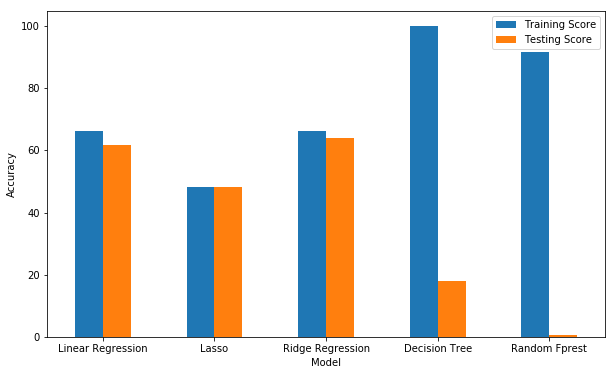

In [21]:
result.plot(kind = 'bar', x = 'Model', figsize = (10, 6))
plt.xticks(rotation = 'horizontal')
plt.ylabel('Accuracy')